In [5]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=",", dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, :-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


dataset = DiabetesDataset("./dataset/diabetes.csv.gz")
# print(dataset.__len__())
# print(dataset.__getitem__(0))
train_loder = DataLoader(dataset=dataset, batch_size=32, shuffle=True, num_workers=2)

In [6]:
# Define the binary classification model
class BinaryClassification(torch.nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        self.linear1 = torch.nn.Linear(8, 4)
        self.linear2 = torch.nn.Linear(4, 2)
        self.linear3 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        x = self.sigmoid(x)

        x = self.linear2(x)
        x = self.sigmoid(x)

        x = self.linear3(x)
        x = self.sigmoid(x)  # Sigmoid to produce output in the range [0, 1]

        return x  # Return the final output


# Instantiate the model
model = BinaryClassification()

# Define the loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
loss_list = []
count = 0

for epoch in range(100):
    loss_sum = 0.0
    for batch_idx, data in enumerate(train_loder, 0):
        inputs, targets = data

        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        loss_sum += loss.item()
        # print(f"Epoch: {epoch}, Batch: {batch_idx}")
        if batch_idx % 23 == 22:
            print(f"Epoch: {epoch}, Batch: {batch_idx}, Loss: {loss_sum/32.0}")
            loss_list.append(loss_sum / 32.0)
        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Update model parameters
        optimizer.step()

Epoch: 0, Batch: 22, Loss: 0.6211895402520895
Epoch: 1, Batch: 22, Loss: 0.5981541480869055
Epoch: 2, Batch: 22, Loss: 0.5770269706845284
Epoch: 3, Batch: 22, Loss: 0.5583674851804972
Epoch: 4, Batch: 22, Loss: 0.5441724471747875
Epoch: 5, Batch: 22, Loss: 0.5313920099288225
Epoch: 6, Batch: 22, Loss: 0.5209887474775314
Epoch: 7, Batch: 22, Loss: 0.5121568907052279
Epoch: 8, Batch: 22, Loss: 0.5046207327395678
Epoch: 9, Batch: 22, Loss: 0.4983237311244011
Epoch: 10, Batch: 22, Loss: 0.4928910657763481
Epoch: 11, Batch: 22, Loss: 0.4881656803190708
Epoch: 12, Batch: 22, Loss: 0.48421130143105984
Epoch: 13, Batch: 22, Loss: 0.4807300418615341
Epoch: 14, Batch: 22, Loss: 0.47907182201743126
Epoch: 15, Batch: 22, Loss: 0.47629231587052345
Epoch: 16, Batch: 22, Loss: 0.47549739480018616
Epoch: 17, Batch: 22, Loss: 0.47364114969968796
Epoch: 18, Batch: 22, Loss: 0.4702592585235834
Epoch: 19, Batch: 22, Loss: 0.4697829056531191
Epoch: 20, Batch: 22, Loss: 0.46842524595558643
Epoch: 21, Batch:

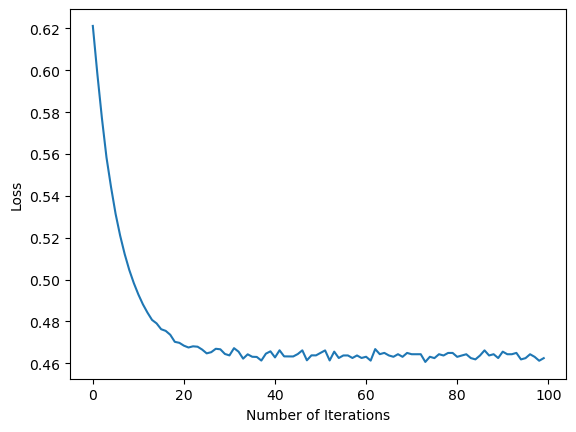

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(100), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()